**!!! ДЛЯ ЗАПУСКА БОТА ВЫПОЛНИТЬ КОД РАЗДЕЛА "ИТОГОВЫЙ ПРОЕКТ" !!!**

In [ ]:
#vibo: Виталий_Бочаров_stepik_id_56089805, telegram(@VitaliyBocharov)

<p style="align: center;"><img align=center src="https://ucarecdn.com/fc1fbe09-464b-4ae1-857f-921adde9311c/" width=900 height=200/></p>
<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ. Deep Learning (семестр 1, осень 2021): продвинутый поток</b></h3>

<h3 style="text-align: center;"><b>Итоговый проект. Телеграм-боты.  Вариант I. Перенос стиля в телеграм-ботах. </b></h3>



Куратор итогового проекта от dls: Аркадий Боков telegram (@Noath)



---



### Постановка задачи

**Техническое задание (Slack, Аркадий Боков)**

#### Вариант 1.


**Перенос стиля в телеграм-ботах:**
- Написать код простой модели, которая сможет переносить стиль с одной фотографии на другую. Можно использовать медленный алгоритм, который мы рассказывали на нашем занятии.
- Сделать бота, которому можно отправить две фотографии и получить в ответ фото с перенесенным стилем.

- *Дополнительная часть для варианта 1: Добавить возможность переносить стиль с помощью GAN'ов.* 


**Этапы работы:**

Основная часть / **Итого: 7 баллов**:

1.   Реализовать модель Neural Style Transfer (любую), перенести функциональность в класс / **2 балла (оценивается модель), блокирующий пункт (т.е., без которого проект не будет засчитан)**
2.   Написать бота, у которого будет диалог, предлагающий прислать картинки, и хэндлер, вызывающий класс из предыдущего пункта, чтобы сгенерировать ответную картинку / **1 балл (оценивается функционал бота), блокирующий пункт (т.е., без которого проект не будет засчитан) + пункты 1-2, работающие вместе - 1 балл**
3.   (опционально) Асинхронность. Если вы раньше не писали приложения для сервера, то ваш код получится не асинхронным, а именно, во время обработки картинки бот будет просто висеть и не сможет ответить другому человеку. 
Это можно исправить, но потребуется хорошее понимание фреймворка, на котором Вы пишете бота, либо же изначальное использование асинхронных фреймворков. Об этом я ещё напишу ниже / **(необязательный) - 0.5 балла**
4.   (опционально) Сделать интерфейс бота интуитивным и удобным, добавить подсказки и разные команды / **(необязательный) - 0.5 балла**
5.   (опционально, НО КРАЙНЕ РЕКОМЕНДУЕТСЯ) Deploy бота на нужном сервисе. Тут рекомендуется Heroku, т.к. он бесплатный и простой. Чуть подробнее об этом ниже / **(необязательный) - 1 балл**
6.   Описать свою работу в достаточной степени подробно, подчеркнуть, с какими трудностями столкнулись, какие решения использовали. Также этот отчёт должен содержать описание итогового результата / **1 балл, блокирующий пункт (т.е., без которого проект не будет засчитан)**



Дополнительная часть (переходить к ней только после выполнения пунктов 1-2 основной части) / **Итого: 3 балла**:

1.   Выбрать какой GAN Вы хотите использовать и какой стиль переносить. Возможно, Вы захотите сделать не совсем перенос стиля, а какую-то другую обработку картинок, что тоже принимается.
2.   Прочитать, как алгоритм работает и понять.
3.   Теперь есть два варианта:

*   Найти готовую реализацию и как-то вызывать ее из своего кода.
*   Натренировать свой GAN. Этот вариант скорее всего потребует вычислительных мощностей и времени, поэтому выбирайте его только если уверены в своих силах (и/или железе).

4.   Дописать бота, чтобы он мог использовать GAN.









---



### Подготовительная работа

#### Модели

##### PyStiche (+)


In [ ]:
#vibo: ссылка на репозиторий  https://github.com/pystiche/pystiche

In [ ]:
# #vibo: устанавливаем готовый модуль NST (Neural Style Transfer) 
# !pip install pystiche

     |████████████████████████████████| 67 kB 3.2 MB/s 


In [ ]:
# #vibo: разбор примера на medium https://medium.com/pytorch/pystiche-a-framework-for-neural-style-transfer-1ea6e4825f32

# #vibo: импортируем библиотеки
# import torch
# import pystiche
# from PIL import Image
# from pystiche import demo, enc, loss, ops, optim

# #vibo: выведем версию pystiche
# print(f"pystiche == {pystiche.__version__}")

# #vibo: выбор девайса на котором будем производить расчет
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print('device ==', device)

pystiche == 1.0.1
device == cuda


In [ ]:
# #vibo: используем предобученную VGG19
# multi_layer_encoder = enc.vgg19_multi_layer_encoder()
# print(multi_layer_encoder)

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

VGGMultiLayerEncoder(
  arch=vgg19, framework=torch
  (preprocessing): TorchPreprocessing(
    (0): Normalize(mean=('0.485', '0.456', '0.406'), std=('0.229', '0.224', '0.225'))
  )
  (conv1_1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1_1): ReLU()
  (conv1_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1_2): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2_1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2_1): ReLU()
  (conv2_2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2_2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3_1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3_1): ReLU()
  (conv3_2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3_2): ReLU()
  (conv3_3): Conv2d(256, 256, kernel_size=(3, 3

In [ ]:
# content_layer = "relu4_2"
# encoder = multi_layer_encoder.extract_encoder(content_layer)
# #vibo: выдает предупреждение
# #content_loss = ops.FeatureReconstructionOperator(encoder)
# #vibo: работает без предупреждения
# content_loss = pystiche.loss.FeatureReconstructionLoss(encoder)

In [ ]:
# style_layers = ("relu1_1", "relu2_1", "relu3_1", "relu4_1", "relu5_1")
# style_weight = 1e3

# def get_encoding_op(encoder, layer_weight):
#     #vibo: выдает предупреждение
#     #return ops.GramOperator(encoder, score_weight=layer_weight)
#     #vibo: работает без предупреждения
#     return pystiche.loss.GramLoss(encoder, score_weight=layer_weight)

# #vibo: выдает предупреждение
# #style_loss = ops.MultiLayerEncodingOperator(multi_layer_encoder, style_layers, get_encoding_op, score_weight=style_weight)
# #vibo: работает без предупреждения
# style_loss = pystiche.loss.MultiLayerEncodingLoss(multi_layer_encoder, style_layers, get_encoding_op, score_weight=style_weight)

In [ ]:
# criterion = loss.PerceptualLoss(content_loss, style_loss).to(device)
# print(criterion)

PerceptualLoss(
  (content_loss): FeatureReconstructionLoss(
    (encoder): VGGMultiLayerEncoder(layer=relu4_2, arch=vgg19, framework=torch)
  )
  (style_loss): MultiLayerEncodingLoss(
    encoder=VGGMultiLayerEncoder(arch=vgg19, framework=torch), score_weight=1000
    (relu1_1): GramLoss(score_weight=0.2)
    (relu2_1): GramLoss(score_weight=0.2)
    (relu3_1): GramLoss(score_weight=0.2)
    (relu4_1): GramLoss(score_weight=0.2)
    (relu5_1): GramLoss(score_weight=0.2)
  )
)


In [ ]:
# #vibo: загружаем demo и устанавливаем максимальный размер картинки
# size = 500
# images = demo.images()
# content_image = images["bird1"].read(size=size, device=device)
# vibo: c демо все работает нормально

In [ ]:
# #vibo: читаем "полученную" от пользователя первую картинку
# content_image = Image.open('/content/content_image.jpg')

# import torchvision.transforms as transforms

# #normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# transforms_image=transforms.Compose([transforms.Resize(512), transforms.CenterCrop(512), transforms.ToTensor()])
# content_image=transforms_image(content_image)

In [ ]:
# criterion.set_content_image(content_image.to(device))

In [ ]:
# import matplotlib.pyplot as plt
# from torchvision import transforms

# #vibo: преобразование к изображению (PIL image)
# unloader = transforms.ToPILImage()
# plt.ion()


# def imshow(tensor, title=None):
#     #vibo: делаем клон тензора, чтобы не изменить оригинал
#     image = tensor.cpu().clone()
#     #vibo: удаляем fake batch dimension
#     image = image.squeeze(0)
#     #vibo: делаем преобразование тензора к картике PIL (unloader выше)
#     image = unloader(image)
#     plt.imshow(image)
#     if title is not None:
#         plt.title(title)
#     #vibo: сделать небольшую паузу, чтобы графики обновились
#     plt.pause(0.001)

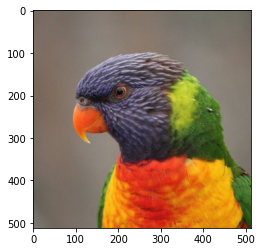

In [ ]:
# #vibo: выводим изображение с помощью функции imshow
# imshow(content_image)

In [ ]:
# #vibo: загрузка demo
# style_image = images["paint"].read(size=size, device=device)
# criterion.set_style_image(style_image)

In [ ]:
# #vibo: читаем вторую, полученную от пользователя картинку
# style_image = Image.open('/content/style_image.jpg')
# style_image=transforms_image(style_image)
# criterion.set_style_image(style_image.to(device))

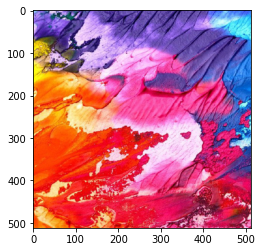

In [ ]:
# imshow(style_image)

In [ ]:
# input_image = content_image.to(device).clone()
# output_image = optim.image_optimization(input_image, criterion, num_steps=500)

Image optimization:   0%|          | 0/500 [00:00<?, ?it/s]

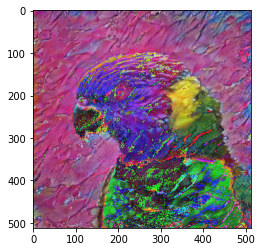

In [ ]:
# imshow(output_image)

In [ ]:
# #vibo: сохраняем картинку, используем преобразование unloader (см. выше) для преобразования к PIL из тензора
# output_image = unloader(output_image)
# output_image.save('output_image.jpg')

##### Magic Framework (-)

In [ ]:
# !pip3 install magic_framework

In [ ]:
#   #vibo: пример из slack - как не примут
# import matplotlib.pyplot as plt
# from magic_framework import NST

# def magic_style_transfer(*args, **kwargs):
#     style = plt.imread(...)
#     content = plt.imread(...)
#     model = NST(...)
    
#     result = model(style, content)
#     return result

##### Pytorch_AdaIN (-)

In [ ]:
#vibo: ссылка на репозиторий https://github.com/irasin/Pytorch_AdaIN

##### DLS-base-line (+)

In [ ]:
#vibo: разбор варианта модели с семинара dls "медленный алгоритм"
#vibo: +(11.01.2019, NST + GAN) https://www.youtube.com/watch?v=u2HDm7YSwoA

In [ ]:
# from PIL import Image
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# import torch.optim as optim
# import matplotlib.pyplot as plt
# import torchvision.transforms as transforms
# import torchvision.models as models
# import copy

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !ls /content/drive/MyDrive/telegram_bot/images/

bird1.jpg  castle.jpg	lisa.jpg    paint.jpg	 user_data_file.txt
bird2.jpg  dancing.jpg	mosaic.jpg  picasso.jpg


In [ ]:
# #vibo: если доступна GPU работаем с размером 512*512, если CPU - 256*256
# imsize = 512 if torch.cuda.is_available() else 256

# #vibo: в примере с семинара
# #imsize = 1024  

# #vibo: предварительная обработка входящих изображений и преобразование в тензор
# loader = transforms.Compose([
#     transforms.Resize(imsize),
#     transforms.CenterCrop(imsize),
#     transforms.ToTensor()])

In [ ]:
# #vibo: выбираем доступный device
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# #vibo: функция первичной обработки изображения
# def image_loader(image_name):
#     image = Image.open(image_name)
#     image = loader(image).unsqueeze(0)
#     return image.to(device, torch.float)

# #vibo: подгружaем картинки style_img + content_img
# #content_img = image_loader("/content/drive/MyDrive/telegram_bot/images/dancing.jpg")
# content_img = image_loader("/content/drive/MyDrive/telegram_bot/images/bird1.jpg")

# #style_img = image_loader("/content/drive/MyDrive/telegram_bot/images/picasso.jpg")
# style_img = image_loader("/content/drive/MyDrive/telegram_bot/images/paint.jpg")

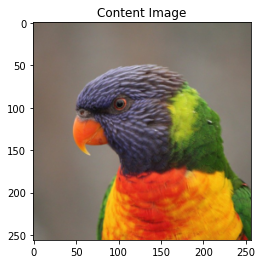

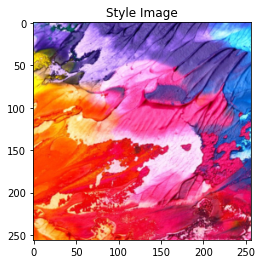

In [ ]:
# #vibo: картинки должны быть максимально близкие по размеру
# #vibo: для перевода тензора в картинку
# unloader = transforms.ToPILImage()  
# #vibo: включает интерактивный режим
# plt.ion() 

# #vibo: функция отрисовки изображения
# def imshow(tensor, title=None):
#     image = tensor.cpu().clone()   
#     image = image.squeeze(0)      
#     image = unloader(image)
#     plt.imshow(image)
#     if title is not None:
#         plt.title(title)
#     plt.pause(0.001) 

# plt.figure()
# imshow(content_img, title='Content Image')

# plt.figure()
# imshow(style_img, title='Style Image')

In [ ]:
# #vibo: Content Loss
# class ContentLoss(nn.Module):

#         #vibo: target он же контент, который прошел через ту часть сети которая находится перед этим
#         def __init__(self, target,):
#             super(ContentLoss, self).__init__()
#             #vibo: в явном виде пишем, чтобы таргет не изменялся
#             #vibo: это константа, убираем ее из вычислений
#             self.target = target.detach()
#             self.loss = F.mse_loss(self.target, self.target)

#         #vibo: input - картинка, которая передается на этот уровень
#         def forward(self, input):
#             #vibo: стандартный mse loss из модуля  torch.nn.functional
#             self.loss = F.mse_loss(input, self.target)
#             #vibo: картинка никак не меняется, только вычисляется loss
#             return input

In [ ]:
# #vibo: векторизируем тензор, который вышел со сверточного слоя (чтобы перемножить вектора - нужны вектора, а не тензоры)
# def gram_matrix(input):
#         #vibo: batch size=1
#         #vibo: h,w - размер feature map 
#         batch_size, h, w, f_map_num = input.size()

#         features = input.view(batch_size * h, w * f_map_num)  

#         #vibo: перемножаем матрицы
#         G = torch.mm(features, features.t())

#         #vibo: нормализуем значения матрицы путем деления на количества элементов в каждой карте объектов
#         return G.div(batch_size * h * w * f_map_num)

In [ ]:
# #vibo: StyleLoss
# class StyleLoss(nn.Module):
#         def __init__(self, target_feature):
#             super(StyleLoss, self).__init__()
#             #vibo: так же в явном виде указываем, что таргет (стиль в данном случае) не менять
#             self.target = gram_matrix(target_feature).detach()
#             self.loss = F.mse_loss(self.target, self.target)

#         def forward(self, input):
#             G = gram_matrix(input)
#             self.loss = F.mse_loss(G, self.target)
#             return input

In [ ]:
# #vibo: нормировка изображений из статьи про обучение сети
# cnn_normalization_mean = torch.tensor([0.485, 0.456, 0.406]).to(device)
# cnn_normalization_std = torch.tensor([0.229, 0.224, 0.225]).to(device)

In [ ]:
# #vibo: нормализация изображений
# class Normalization(nn.Module):
#         def __init__(self, mean, std):
#             super(Normalization, self).__init__()
#             self.mean = torch.tensor(mean).view(-1, 1, 1)
#             self.std = torch.tensor(std).view(-1, 1, 1)

#         def forward(self, img):
#             return (img - self.mean) / self.std

In [ ]:
# #vibo: уровни после которых считаем ошибку контента
# content_layers_default = ['conv_4']
# #vibo: уровни, почле которых считаем ошибку стиля
# style_layers_default = ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']

In [ ]:
# #vibo: загружаем модель
# cnn = models.vgg19(pretrained=True).features.to(device).eval()

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

In [ ]:
# #vibo: просмотр слоев модели
# cnn.parameters

<bound method Module.parameters of Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17)

In [ ]:
# #vibo: делаем свою новую модель из vgg19
# def get_style_model_and_losses(cnn, normalization_mean, normalization_std,
#                                    style_img, content_img,
#                                    content_layers=content_layers_default,
#                                    style_layers=style_layers_default):
#         #vibo: копируем сеть, которую передали в функцию
#         cnn = copy.deepcopy(cnn)

#         #vibo: вставляем нормализующий уровень, т.е. чтобы vgg19 получила на вход такие же картинки, какие привыкла обрабатывать
#         #vibo: парамтры нормализации выше взяты их статьи про vgg19
#         normalization = Normalization(normalization_mean, normalization_std).to(device)

#         #vibo: вводим два листа для сохранения ошибок
#         content_losses = []
#         style_losses = []

#         #vibo: создаем модель, вносим первый уровень с нормализацией
#         model = nn.Sequential(normalization)

#         i = 0 
#         #vibo: идем по уровням, vgg19 (выше она названа cnn)
#         for layer in cnn.children():
#             #vibo: проверяем является ли слой экземпляром класса conv2d
#             if isinstance(layer, nn.Conv2d):
#                 i += 1
#                 #vibo: нумеруем сверточные слои
#                 name = 'conv_{}'.format(i)
#             elif isinstance(layer, nn.ReLU):
#                 name = 'relu_{}'.format(i)
#                 #vibo: пересоздаем, потому, что по другому не работает
#                 layer = nn.ReLU(inplace=False)
#             elif isinstance(layer, nn.MaxPool2d):
#                 name = 'pool_{}'.format(i)
#             elif isinstance(layer, nn.BatchNorm2d):
#                 name = 'bn_{}'.format(i)
#             else:
#                 raise RuntimeError('Unrecognized layer: {}'.format(layer.__class__.__name__))

#             #vibo: выше перебирали слои vgg19 и нумеровали их, ниже складываем их снова в модель
#             model.add_module(name, layer)

#             #vibo: проверяем имя слоя из списов выше (мы определили после каких слоев добавлять loss для контента и стиля)
#             #vibo: если слой из списка контент
#             if name in content_layers:
#                 #vibo: берем контент img
#                 target = model(content_img).detach()
#                 #vibo: считаем контент loss
#                 content_loss = ContentLoss(target)
#                 #vibo: добавляем в модель слой с вычислением контент-loss
#                 model.add_module("content_loss_{}".format(i), content_loss)
#                 #vibo: саму ошибку отправляем в созданный выше лист
#                 content_losses.append(content_loss)

#             #vibo: аналогично для стиль-лосс
#             if name in style_layers:
#                 target_feature = model(style_img).detach()
#                 style_loss = StyleLoss(target_feature)
#                 model.add_module("style_loss_{}".format(i), style_loss)
#                 style_losses.append(style_loss)

#         #vibo: обрезаем модель, т.е. все, что идет после последнего добавленного нами уровня
#         for i in range(len(model) - 1, -1, -1):
#             if isinstance(model[i], ContentLoss) or isinstance(model[i], StyleLoss):
#                 break

#         model = model[:(i + 1)]

#         #vibo: возвращаем модель, которая будет производить вычисления
#         #vibo: также возвращаем два листа лоссов
#         return model, style_losses, content_losses

In [ ]:
# #vibo: устанавливаем оптимизатор, почему такой - из оригинальной статьи про transfer learning (перебрали разные - этот лучший)
# def get_input_optimizer(input_img):
#         optimizer = optim.LBFGS([input_img.requires_grad_()]) 
#         return optimizer

In [ ]:
# style_weight=100000
# #style_weight = 1e3 (#vibo: разошелся)

# #vibo: классическое обучение (num_steps=500 - количество эпох обучения)
# #vibo: style_weight=100000, content_weight=1 (это alfa и betta из формулы про loss)
# def run_style_transfer(cnn, normalization_mean, normalization_std,
#                         content_img, style_img, input_img, num_steps=500,
#                         style_weight=style_weight, content_weight=1):
#         """Run the style transfer."""
#         print('Building the style transfer model..')
#         #vibo: вызываем функцию, с нашей моделью и списками loss
#         model, style_losses, content_losses = get_style_model_and_losses(cnn,
#             normalization_mean, normalization_std, style_img, content_img)
#         #vibo: получаем оптимизатор
#         optimizer = get_input_optimizer(input_img)

#         print('Optimizing..')
#         #vibo: run в виде списка иначе все ломается
#         run = [0]
#         while run[0] <= num_steps:

#             #vibo: функция не вызывается, а подается в качестве агрумента для optimizer.step ниже
#             #vibo: описываем то, как считаем функцию потерь
#             def closure():
#                 #vibo: обрезаем тензор, чтобы цвета не вылетели за 0 и 1
#                 input_img.data.clamp_(0, 1)

#                 #vibo: обнуляем градиент
#                 optimizer.zero_grad()

#                 #vibo: пропускаем картинку через всю нейросеть, чтобы посчитались все лоссы
#                 model(input_img)

#                 #vibo: описываем функцию потреть, она у нас считается не стандартно
#                 style_score = 0
#                 content_score = 0

#                 #vibo: два лосса стиля и контента
#                 for sl in style_losses:
#                     style_score += sl.loss
#                 for cl in content_losses:
#                     content_score += cl.loss
                
#                 #vibo: домножаем на веса
#                 style_score *= style_weight
#                 content_score *= content_weight

#                 #vibo: записываем итоговый лосс
#                 loss = style_score + content_score
#                 #vibo: запускаем обратное распростанение ошибки
#                 #vibo: при этом апдейтим только веса исходной картинки
#                 loss.backward()

#                 #vibo: отрисовка при обучении здачений функции потерь
#                 run[0] += 1
#                 if run[0] % 50 == 0:
#                     print("run {}:".format(run))
#                     print('Style Loss : {:4f} Content Loss: {:4f}'.format(
#                         style_score.item(), content_score.item()))
#                     print()

#                 #vibo: возвращаем потери
#                 return style_score + content_score

#             #vibo: запускаем алгоритм апдейта весов картинки
#             optimizer.step(closure)

#         #vibo: обрезаем тензор, чтобы цвета не вылетели за 0 и 1
#         input_img.data.clamp_(0, 1)

#         #vibo: возвращаем картинку
#         return input_img

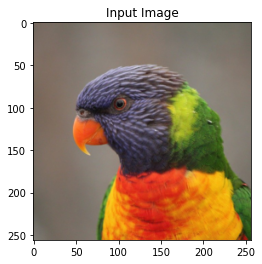

Building the style transfer model..


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


Optimizing..
run [50]:
Style Loss : 178.297272 Content Loss: 47.979836

run [100]:
Style Loss : 33.040024 Content Loss: 44.624653

run [150]:
Style Loss : 8.768751 Content Loss: 38.782722

run [200]:
Style Loss : 5.277001 Content Loss: 33.974617

run [250]:
Style Loss : 4.546482 Content Loss: 31.396646

run [300]:
Style Loss : 3.492942 Content Loss: 29.922348

run [350]:
Style Loss : 3.254234 Content Loss: 28.661247

run [400]:
Style Loss : 5.275286 Content Loss: 27.654543

run [450]:
Style Loss : 3.755681 Content Loss: 27.180115

run [500]:
Style Loss : 3.481259 Content Loss: 28.437067



In [ ]:
# input_img = content_img.clone()

# plt.figure()
# imshow(input_img, title='Input Image')
# output = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std, content_img, style_img, input_img)

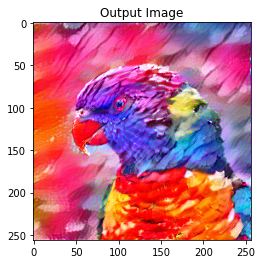

In [ ]:
# plt.figure()
# imshow(output, title='Output Image')
# plt.ioff()
# plt.show()

In [ ]:
# #vibo: преобразовываем тензор в картинку
# output_image = torch.squeeze(output)
# output_image = transforms.ToPILImage()(output_image)
# #vibo: сохраняем полученное изображение
# output_image.save('output_image.jpg')

##### NST in Pytorch (Gregor Koehler) (-)

In [ ]:
#vibo: https://nextjournal.com/gkoehler/pytorch-neural-style-transfer

In [ ]:
# #vibo: 1. Imports
# from PIL import Image
# import matplotlib.pyplot as plt
# import numpy as np

# import torch
# import torch.optim as optim
# from torchvision import transforms, models

In [ ]:
# #vibo: 2. Utility Functions
# def load_image(img_path, max_size=400, shape=None):
#   image = Image.open(img_path).convert('RGB')  
  
#   if max(image.size) > max_size:
#     size = max_size
#   else:
#     size = max(image.size)
	
#   if shape is not None:
#     size = shape
  
#   in_transform = transforms.Compose([
#     transforms.Resize((size, int(1.5*size))),
#     transforms.ToTensor(),
#     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])
  
#   image = in_transform(image)[:3, :, :].unsqueeze(0)
  
#   return image

In [ ]:
# style = load_image('/content/starrynight.jpg')
# style.shape

torch.Size([1, 3, 400, 600])

In [ ]:
# def im_convert(tensor):
#   image = tensor.to("cpu").clone().detach()
#   image = image.numpy().squeeze()
#   image = image.transpose(1, 2, 0)
#   image = image * np.array((0.229, 0.224, 0.225)) + np.array(
#     (0.485, 0.456, 0.406))
#   image = image.clip(0, 1)
  
#   return image

In [ ]:
# def get_features(image, model, layers=None):
#   if layers is None:
#     layers = {'0': 'conv1_1','5': 'conv2_1',
#               '10': 'conv3_1',
#               '19': 'conv4_1',
#               '21': 'conv4_2',  ## content layer
#               '28': 'conv5_1'}
#   features = {}
#   x = image
#   for name, layer in enumerate(model.features):
#     x = layer(x)
#     if str(name) in layers:
#       features[layers[str(name)]] = x
  
#   return features

In [ ]:
# def gram_matrix(tensor):
#   _, n_filters, h, w = tensor.size()
#   tensor = tensor.view(n_filters, h * w)
#   gram = torch.mm(tensor, tensor.t())
  
#   return gram

In [ ]:
# #vibo: 3. Model Setup
# torch.utils.model_zoo.load_url('https://download.pytorch.org/models/vgg19-dcbb9e9d.pth', model_dir='/results/')

In [ ]:
# vgg = models.vgg19()
# vgg.load_state_dict(torch.load(vgg19-dcbb9e9d.pth))

# for param in vgg.parameters():
#   param.requires_grad_(False)

In [ ]:
# #vibo: 3.1 A Little Trick
# for i, layer in enumerate(vgg.features):
#   if isinstance(layer, torch.nn.MaxPool2d):
#     vgg.features[i] = torch.nn.AvgPool2d(kernel_size=2, stride=2, padding=0)

In [ ]:
# torch.cuda.is_available()

In [ ]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# vgg.to(device).eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (17): ReLU(inplace=True)
    (18): AvgPool

In [ ]:
# #vibo: 4. Loading the Content Image
# content = load_image('/content/shanghai.jpg').to(device)
# style = style.to(device)

# content_features = get_features(content, vgg)
# style_features = get_features(style, vgg)

In [ ]:
# style_grams = {
#   layer: gram_matrix(style_features[layer]) for layer in style_features}

In [ ]:
# target = torch.randn_like(content).requires_grad_(True).to(device)

In [ ]:
## target = content.clone().requires_grad_(True).to(device)

In [ ]:
# #vibo: 5. A Loss Function of Artistic Style
# style_weights = {'conv1_1': 0.75,
#                  'conv2_1': 0.5,
#                  'conv3_1': 0.2,
#                  'conv4_1': 0.2,
#                  'conv5_1': 0.2}

# content_weight = 1e4
# style_weight = 1e2

In [ ]:
# #vibo: 6. The Style Transfer Loop
# optimizer = optim.Adam([target], lr=0.01)

In [ ]:
# for i in range(1, 401):
#   optimizer.zero_grad()
#   target_features = get_features(target, vgg)
  
#   content_loss = torch.mean((target_features['conv4_2'] -
#                              content_features['conv4_2']) ** 2)
  
#   style_loss = 0
#   for layer in style_weights:
#     target_feature = target_features[layer]
#     target_gram = gram_matrix(target_feature)
#     _, d, h, w = target_feature.shape
#     style_gram = style_grams[layer]
#     layer_style_loss = style_weights[layer] * torch.mean(
#       (target_gram - style_gram) ** 2)
#     style_loss += layer_style_loss / (d * h * w)
    
#     total_loss = content_weight * content_loss + style_weight * style_loss
#     total_loss.backward(retain_graph=True)
#     optimizer.step()
    
#   if i % 50 == 0:
#     total_loss_rounded = round(total_loss.item(), 2)
#     content_fraction = round(
#       content_weight*content_loss.item()/total_loss.item(), 2)
#     style_fraction = round(
#       style_weight*style_loss.item()/total_loss.item(), 2)
#     print('Iteration {}, Total loss: {} - (content: {}, style {})'.format(
#       i,total_loss_rounded, content_fraction, style_fraction))
      
# final_img = im_convert(target)

In [ ]:
# fig = plt.figure()
# plt.imshow(final_img)
# plt.axis('off')
# plt.savefig('/results/modern_starry.png')


##### NST PyTorch tutorials (-)

In [ ]:
#vibo: https://pytorch.org/tutorials/advanced/neural_style_tutorial.html

In [ ]:
# from __future__ import print_function

# #vibo: незаменимые пакеты для нейронных сетей с PyTorch
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# #vibo: градиентный спуск
# import torch.optim as optim

# #vibo: загружать и отображать картинки
# from PIL import Image
# import matplotlib.pyplot as plt

# #vibo: преобразование изображения PIL в тензоры
# import torchvision.transforms as transforms
# #vibo: обучать или загружать предварительно обученные модели
# import torchvision.models as models

# #vibo: копирование моделей
# import copy

In [ ]:
# #vibo: выбор device для расчетов
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# #vibo: установка размера выходного изображения
# imsize = 512 if torch.cuda.is_available() else 128

# loader = transforms.Compose([
#     #vibo: масштабирование изображения
#     transforms.Resize(imsize),
#     #vibo: преобразование изображения в тензор
#     transforms.ToTensor()])

# #vibo: функция загрузки изображения
# def image_loader(image_name):
#     image = Image.open(image_name)
#     #vibo: fake batch dimension, необходимый для соответствия входным размерам сети
#     image = loader(image).unsqueeze(0)
#     return image.to(device, torch.float)


# style_img = image_loader("/content/picasso.jpg")
# content_img = image_loader("/content/dancing.jpg")

# #vibo: размер изображения для content и style должны совпадать
# assert style_img.size() == content_img.size(), \
#     "we need to import style and content images of the same size"

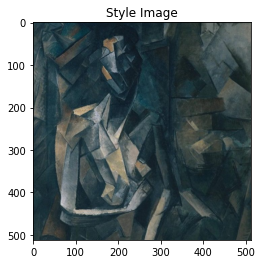

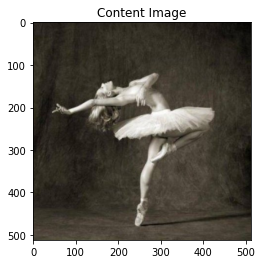

In [ ]:
# #vibo: для преобразования в PIL
# unloader = transforms.ToPILImage()

# plt.ion()

# def imshow(tensor, title=None):
#     #vibo: делаем копию тензора, чтобы не испортить исходный
#     image = tensor.cpu().clone()
#     #vibo: удаление fake размерности
#     image = image.squeeze(0)
#     image = unloader(image)
#     plt.imshow(image)
#     if title is not None:
#         plt.title(title)
#     #vibo: пауза, чтобы картинки обновились
#     plt.pause(0.001)


# plt.figure()
# imshow(style_img, title='Style Image')

# plt.figure()
# imshow(content_img, title='Content Image')

In [ ]:
# class ContentLoss(nn.Module):

#     def __init__(self, target,):
#         super(ContentLoss, self).__init__()
#         # we 'detach' the target content from the tree used
#         # to dynamically compute the gradient: this is a stated value,
#         # not a variable. Otherwise the forward method of the criterion
#         # will throw an error.
#         self.target = target.detach()

#     def forward(self, input):
#         self.loss = F.mse_loss(input, self.target)
#         return input

In [ ]:
# def gram_matrix(input):
#     a, b, c, d = input.size()  # a=batch size(=1)
#     # b=number of feature maps
#     # (c,d)=dimensions of a f. map (N=c*d)

#     features = input.view(a * b, c * d)  # resise F_XL into \hat F_XL

#     G = torch.mm(features, features.t())  # compute the gram product

#     # we 'normalize' the values of the gram matrix
#     # by dividing by the number of element in each feature maps.
#     return G.div(a * b * c * d)

In [ ]:
# class StyleLoss(nn.Module):

#     def __init__(self, target_feature):
#         super(StyleLoss, self).__init__()
#         self.target = gram_matrix(target_feature).detach()

#     def forward(self, input):
#         G = gram_matrix(input)
#         self.loss = F.mse_loss(G, self.target)
#         return input

In [ ]:
# cnn = models.vgg19(pretrained=True).features.to(device).eval()

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

In [ ]:
# cnn_normalization_mean = torch.tensor([0.485, 0.456, 0.406]).to(device)
# cnn_normalization_std = torch.tensor([0.229, 0.224, 0.225]).to(device)

# # create a module to normalize input image so we can easily put it in a
# # nn.Sequential
# class Normalization(nn.Module):
#     def __init__(self, mean, std):
#         super(Normalization, self).__init__()
#         # .view the mean and std to make them [C x 1 x 1] so that they can
#         # directly work with image Tensor of shape [B x C x H x W].
#         # B is batch size. C is number of channels. H is height and W is width.
#         self.mean = torch.tensor(mean).view(-1, 1, 1)
#         self.std = torch.tensor(std).view(-1, 1, 1)

#     def forward(self, img):
#         # normalize img
#         return (img - self.mean) / self.std

In [ ]:
# # desired depth layers to compute style/content losses :
# content_layers_default = ['conv_4']
# style_layers_default = ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']

# def get_style_model_and_losses(cnn, normalization_mean, normalization_std,
#                                style_img, content_img,
#                                content_layers=content_layers_default,
#                                style_layers=style_layers_default):
#     # normalization module
#     normalization = Normalization(normalization_mean, normalization_std).to(device)

#     # just in order to have an iterable access to or list of content/syle
#     # losses
#     content_losses = []
#     style_losses = []

#     # assuming that cnn is a nn.Sequential, so we make a new nn.Sequential
#     # to put in modules that are supposed to be activated sequentially
#     model = nn.Sequential(normalization)

#     i = 0  # increment every time we see a conv
#     for layer in cnn.children():
#         if isinstance(layer, nn.Conv2d):
#             i += 1
#             name = 'conv_{}'.format(i)
#         elif isinstance(layer, nn.ReLU):
#             name = 'relu_{}'.format(i)
#             # The in-place version doesn't play very nicely with the ContentLoss
#             # and StyleLoss we insert below. So we replace with out-of-place
#             # ones here.
#             layer = nn.ReLU(inplace=False)
#         elif isinstance(layer, nn.MaxPool2d):
#             name = 'pool_{}'.format(i)
#         elif isinstance(layer, nn.BatchNorm2d):
#             name = 'bn_{}'.format(i)
#         else:
#             raise RuntimeError('Unrecognized layer: {}'.format(layer.__class__.__name__))

#         model.add_module(name, layer)

#         if name in content_layers:
#             # add content loss:
#             target = model(content_img).detach()
#             content_loss = ContentLoss(target)
#             model.add_module("content_loss_{}".format(i), content_loss)
#             content_losses.append(content_loss)

#         if name in style_layers:
#             # add style loss:
#             target_feature = model(style_img).detach()
#             style_loss = StyleLoss(target_feature)
#             model.add_module("style_loss_{}".format(i), style_loss)
#             style_losses.append(style_loss)

#     # now we trim off the layers after the last content and style losses
#     for i in range(len(model) - 1, -1, -1):
#         if isinstance(model[i], ContentLoss) or isinstance(model[i], StyleLoss):
#             break

#     model = model[:(i + 1)]

#     return model, style_losses, content_losses

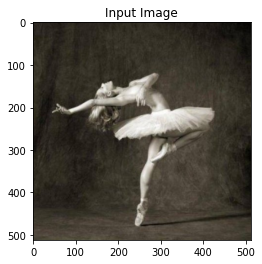

In [ ]:
# input_img = content_img.clone()
# # if you want to use white noise instead uncomment the below line:
# # input_img = torch.randn(content_img.data.size(), device=device)

# # add the original input image to the figure:
# plt.figure()
# imshow(input_img, title='Input Image')

In [ ]:
# def get_input_optimizer(input_img):
#     # this line to show that input is a parameter that requires a gradient
#     optimizer = optim.LBFGS([input_img])
#     return optimizer

In [ ]:
# def run_style_transfer(cnn, normalization_mean, normalization_std,
#                        content_img, style_img, input_img, num_steps=300,
#                        style_weight=1000000, content_weight=1):
#     """Run the style transfer."""
#     print('Building the style transfer model..')
#     model, style_losses, content_losses = get_style_model_and_losses(cnn,
#         normalization_mean, normalization_std, style_img, content_img)

#     # We want to optimize the input and not the model parameters so we
#     # update all the requires_grad fields accordingly
#     input_img.requires_grad_(True)
#     model.requires_grad_(False)

#     optimizer = get_input_optimizer(input_img)

#     print('Optimizing..')
#     run = [0]
#     while run[0] <= num_steps:

#         def closure():
#             # correct the values of updated input image
#             with torch.no_grad():
#                 input_img.clamp_(0, 1)

#             optimizer.zero_grad()
#             model(input_img)
#             style_score = 0
#             content_score = 0

#             for sl in style_losses:
#                 style_score += sl.loss
#             for cl in content_losses:
#                 content_score += cl.loss

#             style_score *= style_weight
#             content_score *= content_weight

#             loss = style_score + content_score
#             loss.backward()

#             run[0] += 1
#             if run[0] % 50 == 0:
#                 print("run {}:".format(run))
#                 print('Style Loss : {:4f} Content Loss: {:4f}'.format(
#                     style_score.item(), content_score.item()))
#                 print()

#             return style_score + content_score

#         optimizer.step(closure)

#     # a last correction...
#     with torch.no_grad():
#         input_img.clamp_(0, 1)

#     return input_img

Building the style transfer model..
Optimizing..


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  del sys.path[0]


run [50]:
Style Loss : 4.285359 Content Loss: 4.234777

run [100]:
Style Loss : 1.146520 Content Loss: 3.053317

run [150]:
Style Loss : 0.722489 Content Loss: 2.650872

run [200]:
Style Loss : 0.479451 Content Loss: 2.500243

run [250]:
Style Loss : 0.345303 Content Loss: 2.411939

run [300]:
Style Loss : 0.262752 Content Loss: 2.359367



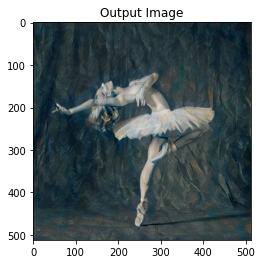

In [ ]:
# output = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
#                             content_img, style_img, input_img)

# plt.figure()
# imshow(output, title='Output Image')

# # sphinx_gallery_thumbnail_number = 4
# plt.ioff()
# plt.show()

In [ ]:
# #vibo: преобразовываем тензор в картинку
# output_image = torch.squeeze(output)
# output_image = transforms.ToPILImage()(output_image)
# #vibo: сохраняем полученное изображение
# output_image.save('output_image.jpg')

##### Photorealistic ST in PyTorch (Kushajveer Singh) (-)

In [ ]:
#vibo: https://kushaj.medium.com/all-you-need-for-photorealistic-style-transfer-in-pytorch-acb099667fc8

In [ ]:
# import torch

In [ ]:
# if torch.cuda.is_available():
#     device = torch.device('cuda')
# else:
#     raise Exception('GPU is not available')
    
# # Load VGG19 features. We do not need the last linear layers,
# # only CNN layers are needed
# vgg = vgg19(pretrained=True).features
# vgg = vgg.to(device)
# # We don't want to train VGG
# for param in vgg.parameters():
#     param.requires_grad_(False)
    
# torch.backends.cudnn.benchmark = True

In [ ]:
# content_img = load_image(os.path.join(args.img_root, args.content_img), size=500)
# content_img = content_img.to(device)

# style_img = load_image(os.path.join(args.img_root, args.style_img))
# style_img = style_img.to(device)

# # Show content and style image
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
# ax1.imshow(im_convert(content_img))
# ax2.imshow(im_convert(style_img))
# plt.show()

# # Utility functions
# def im_convert(img):
#     """
#     Convert img from pytorch tensor to numpy array, so we can plot it.
#     It follows the standard method of denormalizing the img and clipping
#     the outputs
    
#     Input:
#         img :- (batch, channel, height, width)
#     Output:
#         img :- (height, width, channel)
#     """
#     img = img.to('cpu').clone().detach()
#     img = img.numpy().squeeze(0)
#     img = img.transpose(1, 2, 0)
#     img = img * np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))
#     img = img.clip(0, 1)
#     return img

# def load_image(path, size=None):
#     """
#     Resize img to size, size should be int and also normalize the
#     image using imagenet_stats
#     """
#     img = Image.open(path)
#     if size is not None:
#         img = img.resize((size, size))
    
#     transform = transforms.Compose([
#         transforms.ToTensor(),
#         transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
#     ])
#     img = transform(img).unsqueeze(0)
#     return img

In [ ]:
# # Downsampling function
# def conv_down(in_c, out_c, stride=2):
#     return nn.Conv2d(in_c, out_c, kernel_size=3, stride=stride, padding=1)

# # Upsampling function
# def upsample(input, scale_factor):
#     return F.interpolate(input=input, scale_factor=scale_factor, mode='bilinear', align_corners=False)

In [ ]:
# # Helper class for BottleneckBlock
# class ConvLayer(nn.Module):
#     def __init__(self, in_channels, out_channels, kernel_size, stride=1):
#         super().__init__()
#         # We have to keep the size of images same, so choose padding accordingly
#         num_pad = int(np.floor(kernel_size / 2))
#         self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding=num_pad)
#     def forward(self, x):
#         return self.conv(x)

# class BottleneckBlock(nn.Module):
#     """
#     Bottleneck layer similar to resnet bottleneck layer. InstanceNorm is used
#     instead of BatchNorm because when we want to generate images, we normalize
#     all the images independently. 
    
#     (In batch norm you compute mean and std over complete batch, while in instance 
#     norm you compute mean and std for each image channel independently). The reason for 
#     doing this is, the generated images are independent of each other, so we should
#     not normalize them using a common statistic.
    
#     If you confused about the bottleneck architecture refer to the official pytorch
#     resnet implementation and paper.
#     """
#     def __init__(self, in_channels, out_channels, kernel_size=3, stride=1):
#         super().__init__()
#         self.in_c = in_channels
#         self.out_c = out_channels
        
#         self.identity_block = nn.Sequential(
#             ConvLayer(in_channels, out_channels//4, kernel_size=1, stride=1),
#             nn.InstanceNorm2d(out_channels//4),
#             nn.ReLU(),
#             ConvLayer(out_channels//4, out_channels//4, kernel_size, stride=stride),
#             nn.InstanceNorm2d(out_channels//4),
#             nn.ReLU(),
#             ConvLayer(out_channels//4, out_channels, kernel_size=1, stride=1),
#             nn.InstanceNorm2d(out_channels),
#             nn.ReLU(),
#         )
        
#         self.shortcut = nn.Sequential(
#             ConvLayer(in_channels, out_channels, 1, stride),
#             nn.InstanceNorm2d(out_channels),
#         )
    
#     def forward(self, x):
#         out = self.identity_block(x)
#         if self.in_c == self.out_c:
#             residual = x
#         else:
#             residual = self.shortcut(x)
#         out += residual
#         out = F.relu(out)
#         return out

In [ ]:
# class HRNet(nn.Module):
#     """
#     For model reference see Figure 2 of the paper https://arxiv.org/pdf/1904.11617v1.pdf.
    
#     Naming convention used.
#     I refer to vertical layers as a single layer, so from left to right we have 8 layers
#     excluding the input image.
#     E.g. layer 1 contains the 500x500x16 block
#          layer 2 contains 500x500x32 and 250x250x32 blocks and so on
    
#     self.layer{x}_{y}:
#         x :- the layer number, as explained above
#         y :- the index number for that function starting from 1. So if layer 3 has two
#              downsample functions I write them as `downsample3_1`, `downsample3_2`
#     """
#     def __init__(self):
#         super().__init__()
#         self.layer1_1 = BottleneckBlock(3, 16)
        
#         self.layer2_1 = BottleneckBlock(16, 32)
#         self.downsample2_1 = conv_down(16, 32)
        
#         self.layer3_1 = BottleneckBlock(32, 32)
#         self.layer3_2 = BottleneckBlock(32, 32)
#         self.downsample3_1 = conv_down(32, 32)
#         self.downsample3_2 = conv_down(32, 32, stride=4)
#         self.downsample3_3 = conv_down(32, 32)
        
#         self.layer4_1 = BottleneckBlock(64, 64)
#         self.layer5_1 = BottleneckBlock(192, 64)
#         self.layer6_1 = BottleneckBlock(64, 32)
#         self.layer7_1 = BottleneckBlock(32, 16)
#         self.layer8_1 = conv_down(16, 3, stride=1) # Needed conv layer so reused conv_down function
        
#     def forward(self, x):
#         map1_1 = self.layer1_1(x)
        
#         map2_1 = self.layer2_1(map1_1)
#         map2_2 = self.downsample2_1(map1_1)
        
#         map3_1 = torch.cat((self.layer3_1(map2_1), upsample(map2_2, 2)), 1)
#         map3_2 = torch.cat((self.downsample3_1(map2_1), self.layer3_2(map2_2)), 1)
#         map3_3 = torch.cat((self.downsample3_2(map2_1), self.downsample3_3(map2_2)), 1)
        
#         map4_1 = torch.cat((self.layer4_1(map3_1), upsample(map3_2, 2), upsample(map3_3, 4)), 1)
        
#         out = self.layer5_1(map4_1)
#         out = self.layer6_1(out)
#         out = self.layer7_1(out)
#         out = self.layer8_1(out)
        
#         return out

In [ ]:
# def get_features(img, model, layers=None):
#     """
#     Use VGG19 to extract features from the intermediate layers.
#     """
#     if layers is None:
#         layers = {
#             '0' : 'conv1_1',  # style layer
#             '5' : 'conv2_1',  # style layer
#             '10': 'conv3_1',  # style layer
#             '19': 'conv4_1',  # style layer
#             '28': 'conv5_1',  # style layer
            
#             '21': 'conv4_2'   # content layer
#         }
    
#     features = {}
#     x = img
#     for name, layer in model._modules.items():
#         x = layer(x)
#         if name in layers:
#             features[layers[name]] = x
            
#     return features

In [ ]:
# style_net = HRNet().to(device)

# target = style_net(content_img).to(device)
# target.requires_grad_(True)

# target_features = get_features(target, vgg)
# content_loss = torch.mean((target_features['conv4_2'] - content_features['conv4_2']) ** 2)

In [ ]:
# def get_gram_matrix(img):
#     """
#     Compute the gram matrix by converting to 2D tensor and doing dot product
#     img: (batch, channel, height, width)
#     """
#     b, c, h, w = img.size()
#     img = img.view(b*c, h*w)
#     gram = torch.mm(img, img.t())
#     return gram
    

# # There are 5 layers, and we compute style loss for each layer and sum them up
# style_loss = 0
# for layer in layers:
#     target_gram_matrix = get_gram_matrix(target_feature)
#     # we already computed gram matrix for our style image
#     style_gram_matrix = style_gram_matrixs[layer]

#     layer_style_loss = style_weights[layer] * torch.mean((target_gram_matrix - style_gram_matrix) ** 2)
#     b, c, h, w = target_feature.shape
#     style_loss += layer_style_loss / (c*h*w)

In [ ]:
# content_loss = content_weight * content_loss
# style_loss = style_weight * style_loss

#### Telegram bot

##### PyTelegramBotAPI (Telebot)

In [ ]:
#vibo: первоисточник на habr
#vibo: https://habr.com/ru/post/442800/

In [ ]:
#vibo: репозиторий TelegramBotAPI
#vibo: https://github.com/eternnoir/pyTelegramBotAPI

In [ ]:
#vibo: регистрация бота для получения токена

#vibo: идем на @botfarther в telegram 
#vibo: регистрируем нового бота /newbot
#vibo: выбираем имя для бота NST_vibo
#vibo: выбираем имя пользователя для бота (должно заканчиваться на _bot) NST_vibo_bot
#vibo: полученный токен сохраняем

In [ ]:
# #vibo: устанавливаем библиотеку
# !pip install pytelegrambotapi

In [ ]:
#vibo: расшаренная папка на google-диске
#https://drive.google.com/drive/folders/1w4l_M1SZjtkECvVdNeWtrfULoZ3PyofL?usp=sharing
#vibo: там же взял file-id


In [ ]:
# #vibo: устанавливаем загрузчик с google-drive
# !pip install googledrivedownloader

In [ ]:
# #vibo: загружаем библиотеку для загрузки файлов в colab
# from google_drive_downloader import GoogleDriveDownloader as gdd

# #vibo: скачиваем расшаренные файлы для примера
# gdd.download_file_from_google_drive(file_id='1b7jWjSJ0MZuoXdHGuiJV2Wj395S5C6u1', dest_path = '/content/file1.jpeg')
# gdd.download_file_from_google_drive(file_id='1FPvVTr__mVSqfMOYyb5cdwfnKWmZ8c4U', dest_path = '/content/file2.jpeg')
# gdd.download_file_from_google_drive(file_id='1wcJc8nVC2gFkBR9R87yqlxnv0z6dKcPq', dest_path = '/content/file3.jpeg')

In [ ]:
# import urllib.request
# logo = urllib.request.urlopen("https://drive.google.com/uc?id=1gkTOtZ7K72IxxTQ8W1bHMmLglvAYUfIe&export=download").read()
# f = open("photo.jpg", "wb")
# f.write(logo)
# f.close()

In [ ]:
# #vibo: импортируем библиотеку
# import telebot
# from telebot import types
# from PIL import Image

In [ ]:
# #vibo: подключаем токен бота
# bot = telebot.TeleBot('5262420063:AAEurVTkgPuxoAHZSaekJ-3k8AdWV4Ec3H0')

In [ ]:
# #vibo: вариант 1_объявим метод для получения текстовых сообщений
# @bot.message_handler(content_types=['text', 'document', 'audio'])
# def get_text_messages(message):
#   #vibo: 
#   if message.text == "Привет":
#     bot.send_message(message.from_user.id, "Привет, чем я могу тебе помочь?")
#   elif message.text == "/help":
#     bot.send_message(message.from_user.id, "Напиши привет")
#   else:
#     bot.send_message(message.from_user.id, "Я тебя не понимаю. Напиши /help.")

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [ ]:
# #vibo: вариант 2_диалог с сохранением данных пользователя в папку google диск
# name = ''
# surname = ''
# age = 0


# @bot.message_handler(content_types=['text'])

# def start(message):
#     if message.text == '/reg':
#         bot.send_message(message.from_user.id, "Как тебя зовут?")
#         bot.register_next_step_handler(message, get_name); #следующий шаг – функция get_name
#     else:
#         bot.send_message(message.from_user.id, 'Напиши /reg')

# def get_name(message): #получаем фамилию
#     global name;
#     name = message.text;
#     bot.send_message(message.from_user.id, 'Какая у тебя фамилия?')
#     bot.register_next_step_handler(message, get_surname)

# def get_surname(message):
#     global surname
#     surname = message.text
#     bot.send_message(message.from_user.id,'Сколько тебе лет?')
#     bot.register_next_step_handler(message, get_age)

# # def get_age(message):
# #     global age;
# #     while age == 0: #проверяем что возраст изменился
# #         try:
# #              age = int(message.text) #проверяем, что возраст введен корректно
# #         except Exception:
# #              bot.send_message(message.from_user.id, 'Цифрами, пожалуйста');
# #       bot.send_message(message.from_user.id, 'Тебе '+str(age)+' лет, тебя зовут '+name+' '+surname+'?')

# #vibo: доработанный get_age с копками подтверждения
# def get_age(message):
#     # global age
#     # while age == 0: #проверяем что возраст изменился
#     #     try:
#     #          age = int(message.text) #проверяем, что возраст введен корректно
#     #     except Exception:
#     #          bot.send_message(message.from_user.id, 'Цифрами, пожалуйста')

#     global age
#     age = message.text
#     bot.send_message(message.from_user.id,'Спасибо!')

#     keyboard = types.InlineKeyboardMarkup() #наша клавиатура
#     key_yes = types.InlineKeyboardButton(text='Да', callback_data='yes') #кнопка «Да»
#     keyboard.add(key_yes) #добавляем кнопку в клавиатуру
#     key_no= types.InlineKeyboardButton(text='Нет', callback_data='no')
#     keyboard.add(key_no)
#     question = 'Тебе '+str(age)+' лет, тебя зовут '+name+' '+surname+'?'
    
#     bot.send_message(message.from_user.id, text=question, reply_markup=keyboard)

# #vibo: метод-обработчик
# @bot.callback_query_handler(func=lambda call: True)
# def callback_worker(call):
#     user_data = []
#     if call.data == "yes": #call.data это callback_data, которую мы указали при объявлении кнопки
#         user_data.append(''+name+' '+surname+' '+str(age)+'') #код сохранения данных, или их обработки
#         bot.send_message(call.message.chat.id, 'Запомню : )')

#         #vibo: сохранение на google-disk
#         with open("/content/drive/MyDrive/images/user_data_file.txt", "a") as file:
#           file.write(str(user_data) + '\n')

#     elif call.data == "no":
#          bot.send_message(call.message.chat.id, 'Напиши /reg')

In [ ]:
# #vibo: вариант_3_загрузка фото
# #vibo: добавляем 'photo' к типам данных
# @bot.message_handler(content_types=['text', 'photo'])

# #vibo: приветствие с запросом первого изображения (content_image)
# def start(message):
#     if message.text == '/start':
#         bot.send_message(message.from_user.id, 'Привет! Я, Neural Style Transfer Bot!')
#         bot.send_message(message.from_user.id, 'Я умею переносить стиль с одной картинки на другую.')
#         bot.send_message(message.from_user.id, "Загрузи первую картинку:")      
#         bot.register_next_step_handler(message, get_content); #следующий шаг – функция get_name
#     else:
#         pass

# #vibo: получаем первое изображение (content_image), запрашиваем второе изображение (style_image)
# def get_content(message):
#     raw = message.photo[2].file_id
#     name = raw+".jpg"
#     file_info = bot.get_file(raw)
#     downloaded_file = bot.download_file(file_info.file_path)
#     with open("content_image.jpg", 'wb') as new_file:
#         new_file.write(downloaded_file)

#     bot.send_message(message.from_user.id, 'Ок! Эту картинку будем раскрашивать.')
#     bot.send_message(message.from_user.id, 'Теперь загрузи вторую:')
#     bot.register_next_step_handler(message, get_style)

# #vibo: получаем второе изображение (style_image)
# def get_style(message):
#     raw = message.photo[2].file_id
#     name = raw+".jpg"
#     file_info = bot.get_file(raw)
#     downloaded_file = bot.download_file(file_info.file_path)
#     with open("style_image.jpg", 'wb') as new_file:
#         new_file.write(downloaded_file)

#     bot.send_message(message.from_user.id, 'Эту картинку используем в качестве стиля.')

#     keyboard = types.InlineKeyboardMarkup() #наша клавиатура
#     key_yes = types.InlineKeyboardButton(text='ДА!', callback_data='yes') #кнопка «Да»
#     keyboard.add(key_yes) #добавляем кнопку в клавиатуру
#     key_no= types.InlineKeyboardButton(text='нет, повыбираю еще', callback_data='no')
#     keyboard.add(key_no)
#     question = 'Отличный выбор! Начинаем?'
    
#     bot.send_message(message.from_user.id, text=question, reply_markup=keyboard)

# #vibo: метод-обработчик
# @bot.callback_query_handler(func=lambda call: True)
# def callback_worker(call):
#     if call.data == "yes": #call.data это callback_data, которую мы указали при объявлении кнопки
#         bot.send_message(call.message.chat.id, 'Ок. Начинаю переносить стиль.')
#         bot.send_message(call.message.chat.id, 'Нужно подождать...')
        
#         output_image = Image.open('/content/output_image.jpg')
#         bot.send_photo(call.message.chat.id, output_image)
#         bot.send_message(call.message.chat.id, 'Готово!')
#         bot.send_message(call.message.chat.id, 'Чтобы начать заново нажми /start')

#     elif call.data == "no":
#          bot.send_message(call.message.chat.id, 'Чтобы начать заново нажми /start')

In [ ]:
# #vibo: вариант - 4, тело бота-1

# #vibo: добавляем типы данных для работы в telebot
# @bot.message_handler(content_types=['text', 'photo'])

# #vibo: приветствие с запросом первого изображения для content_image
# def start(message):
#     if message.text == '/start':
#         bot.send_message(message.from_user.id, 'Привет! Я, Neural Style Transfer Bot!')
#         bot.send_message(message.from_user.id, 'Я умею переносить стиль с одной картинки на другую.')
#         bot.send_message(message.from_user.id, "Загрузи первую картинку:")      
#         #vibo: переход на следующий шаг с запуском get_content
#         bot.register_next_step_handler(message, get_content)
#     else:
#         pass

# #vibo: получаем первое изображение (content_image), запрашиваем второе изображение (style_image)
# def get_content(message):
#     #vibo: сохраняем полученный файл
#     raw = message.photo[2].file_id
#     name = raw+".jpg"
#     file_info = bot.get_file(raw)
#     downloaded_file = bot.download_file(file_info.file_path)
#     with open("content_image.jpg", 'wb') as new_file:
#         new_file.write(downloaded_file)

#     bot.send_message(message.from_user.id, 'Ок! Эту картинку будем раскрашивать.')
#     bot.send_message(message.from_user.id, 'Теперь загрузи вторую:')
#     #vibo: переходим на следующий шаг get_style
#     bot.register_next_step_handler(message, get_style)

# #vibo: получаем второе изображение (style_image)
# def get_style(message):
#     #vibo: сохраняем второе изображение
#     raw = message.photo[2].file_id
#     name = raw+".jpg"
#     file_info = bot.get_file(raw)
#     downloaded_file = bot.download_file(file_info.file_path)
#     with open("style_image.jpg", 'wb') as new_file:
#         new_file.write(downloaded_file)

#     bot.send_message(message.from_user.id, 'Эту картинку используем в качестве стиля.')

#     #vibo: реализуем кнопки выбора для запуска переноса стиля
#     keyboard = types.InlineKeyboardMarkup() #наша клавиатура
#     key_yes = types.InlineKeyboardButton(text='ДА!', callback_data='yes') #кнопка «Да»
#     keyboard.add(key_yes) #добавляем кнопку в клавиатуру
#     key_no= types.InlineKeyboardButton(text='нет, повыбираю еще', callback_data='no')
#     keyboard.add(key_no)
#     question = 'Отличный выбор! Начинаем?'
#     bot.send_message(message.from_user.id, text=question, reply_markup=keyboard)

# #vibo: метод-обработчик
# @bot.callback_query_handler(func=lambda call: True)
# def callback_worker(call):
#     #vibo: callback_data, которую мы указали при объявлении кнопки
#     if call.data == "yes": 
#         bot.send_message(call.message.chat.id, 'Ок. Начинаю переносить стиль.')
#         bot.send_message(call.message.chat.id, 'Нужно подождать...')
        
#         #vibo: запуск модели для переноса стиля
#         #vibo: читает файлы, полученные от пользователя, сохраненные в colab
#         #vibo: сохраняет в colab файл с перенесенным стилем 
#         nst_model_1()

#         #vibo: читаем полученный файл после преобразования                                                       
#         output_image = Image.open('/content/output_image.jpg')
#         #vibo: отправляем полученное изображение в чат
#         bot.send_photo(call.message.chat.id, output_image)
#         bot.send_message(call.message.chat.id, 'Готово!')
#         bot.send_message(call.message.chat.id, 'Чтобы начать заново нажми /start')

#     #vibo: возвращаем пользователя в начало
#     elif call.data == "no":
#          bot.send_message(call.message.chat.id, 'Чтобы начать заново нажми /start')

In [ ]:
# #vibo: Теперь наш бот будет постоянно спрашивать у сервера Телеграмма «Мне кто-нибудь написал?»
# bot.polling(none_stop=True, interval=0)

In [ ]:
#vibo: для перехода к боту используй qr-code

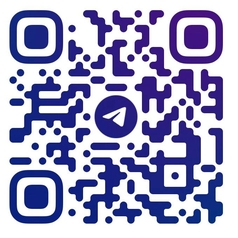

In [ ]:
# #vibo: пример пересылки картинки в другую группу
# #vibo: https://qna.habr.com/q/509409

# @bot.message_handler(content_types=["text", "sticker", "pinned_message", "photo", "audio"])
# def echo_msg(message):
#     if message.content_type == 'text':
#         bot.send_message(chatID, "Запрос от\n*{name} {last}*\n{text}".format(name=message.chat.first_name, last=message.chat.last_name, text=message.text), parse_mode="Markdown") #от кого идет сообщение и его содержание
#         bot.send_message(message.chat.id, "*{name}!*\n\nСпасибо за инфу".format(name=message.chat.first_name, last=message.chat.last_name, text=message.text), parse_mode="Markdown") #то что пойдет юзеру после отправки сообщения

#     elif message.content_type == 'photo':
#             raw = message.photo[2].file_id
#             name = raw+".jpg"
#             file_info = bot.get_file(raw)
#             downloaded_file = bot.download_file(file_info.file_path)
#             with open(name,'wb') as new_file:
#                 new_file.write(downloaded_file)
#             img = open(name, 'rb')
#             bot.send_message(chatID, "Запрос от\n*{name} {last}*".format(name=message.chat.first_name, last=message.chat.last_name), parse_mode="Markdown") #от кого идет сообщение и его содержание
#             bot.send_photo(chatID, img)
#             bot.send_message(message.chat.id, "*{name}!*\n\nСпасибо за инфу".format(name=message.chat.first_name, last=message.chat.last_name, text=message.text), parse_mode="Markdown") #то что пойдет юзеру после отправки сообщения


### **ИТОГОВЫЙ ПРОЕКТ**

#### Telebot

In [1]:
#vibo: устанавливаем библиотеку для работы с telebot
!pip install pytelegrambotapi

     |████████████████████████████████| 147 kB 10.6 MB/s 
  Created wheel for pytelegrambotapi: filename=pyTelegramBotAPI-4.4.0-py3-none-any.whl size=128152 sha256=b73922074fe091012cfac02448336e11bc47a23542534cbf00667bc7b9110f5c
  Stored in directory: /root/.cache/pip/wheels/1e/6d/ff/435b12799b8212017f08dbbfdb7a1e5174d72d20fb7c0f4703
Successfully built pytelegrambotapi


In [2]:
#vibo: устанавливаем загрузчик с google-drive
!pip install googledrivedownloader

In [3]:
#vibo: устанавливаем emoji
!pip install emoji

     |████████████████████████████████| 174 kB 12.5 MB/s 
  Created wheel for emoji: filename=emoji-1.6.3-py3-none-any.whl size=170298 sha256=890cdd8f50c72f9dd26a40af82c7986c28050c3bcc8c9f454f8f9f3e374d0a1a
  Stored in directory: /root/.cache/pip/wheels/03/8b/d7/ad579fbef83c287215c0caab60fb0ae0f30c4d7ce5f580eade
Successfully built emoji


In [4]:
#vibo: импортируем библиотеки для работы с ботом и обработки изображений + смайлы
import telebot
from telebot import types
from PIL import Image
import emoji

#vibo: загружаем библиотеку для загрузки файлов в colab
from google_drive_downloader import GoogleDriveDownloader as gdd

In [5]:
#vibo: региструю бот для получения его токена

#vibo: идем на @botfarther в telegram 
#vibo: регистрируем нового бота - /newbot
#vibo: выбираем имя для бота - NST_vibo
#vibo: выбираем имя пользователя для бота (должно заканчиваться на _bot) - NST_vibo_bot
#vibo: полученный токен сохраняем

In [6]:
#vibo: подключаем токен бота
bot = telebot.TeleBot('5262420063:AAEurVTkgPuxoAHZSaekJ-3k8AdWV4Ec3H0')

In [7]:
# #vibo: тело бота-2 с примером и моделью 1.

# #vibo: добавляем типы данных для работы в telebot
# @bot.message_handler(content_types=['text', 'photo'])

# #vibo: приветствие с первым меню выбора
# def start(message):
#     if message.text == '/start':
#         bot.send_message(message.from_user.id, emoji.emojize('Привет! Я, Neural Style Transfer Bot!', use_aliases=True))
#         bot.send_message(message.from_user.id, emoji.emojize('Я умею переносить стиль с одной картинки на другую.', use_aliases=True))

#         #vibo: реализуем кнопки выбора для первого меню (пример или начало работы)
#         #vibo: клавиатура
#         keyboard_1 = types.InlineKeyboardMarkup()
#         #vibo: кнопка выбора примера
#         key_yes_1 = types.InlineKeyboardButton(text=emoji.emojize('Посмотреть пример', use_aliases=True), callback_data='yes_1')
#         #vibo: добавляем кнопку в клавиатуру
#         keyboard_1.add(key_yes_1)
#         #vibo: кнопка начала работы
#         key_no_1= types.InlineKeyboardButton(text=emoji.emojize('Начать работу', use_aliases=True), callback_data='no_1')
#         #vibo: добавляем кнопку в клавиатуру
#         keyboard_1.add(key_no_1)

#         #vibo: диалоговый запрос перед кнопками
#         question = emoji.emojize('Можешь посмотреть заготовленный пример или сразу перейти к загрузке своих изображений:', use_aliases=True)
#         bot.send_message(message.from_user.id, text=question, reply_markup=keyboard_1)

# #vibo: получаем первое изображение (content_image), запрашиваем второе изображение (style_image)
# def get_content(message):
#     #vibo: сохраняем полученный файл
#     raw = message.photo[2].file_id
#     name = raw+".jpg"
#     file_info = bot.get_file(raw)
#     downloaded_file = bot.download_file(file_info.file_path)
#     with open("content_image.jpg", 'wb') as new_file:
#         new_file.write(downloaded_file)

#     bot.send_message(message.from_user.id, emoji.emojize('Ок! Эту картинку будем раскрашивать.', use_aliases=True))
#     bot.send_message(message.from_user.id, emoji.emojize('Теперь загрузи вторую:', use_aliases=True))
#     #vibo: переходим на следующий шаг get_style
#     bot.register_next_step_handler(message, get_style)

# #vibo: получаем второе изображение (style_image)
# def get_style(message):
#     #vibo: сохраняем второе изображение
#     raw = message.photo[2].file_id
#     name = raw+".jpg"
#     file_info = bot.get_file(raw)
#     downloaded_file = bot.download_file(file_info.file_path)
#     with open("style_image.jpg", 'wb') as new_file:
#         new_file.write(downloaded_file)

#     bot.send_message(message.from_user.id, emoji.emojize('Эту картинку используем в качестве стиля.', use_aliases=True))

#     #vibo: реализуем кнопки выбора для запуска переноса стиля
#     keyboard_2 = types.InlineKeyboardMarkup() #наша клавиатура
#     key_yes_2 = types.InlineKeyboardButton(text=emoji.emojize('Да, поехали!', use_aliases=True), callback_data='yes_2')
#     keyboard_2.add(key_yes_2) #добавляем кнопку в клавиатуру
#     key_no_2 = types.InlineKeyboardButton(text=emoji.emojize('Нет, поменяю картинки', use_aliases=True), callback_data='no_2')
#     keyboard_2.add(key_no_2)
#     question = emoji.emojize('Все готово для старта! Начинаем перенос стиля?', use_aliases=True)
#     bot.send_message(message.from_user.id, text=question, reply_markup=keyboard_2)

# #vibo: метод-обработчик
# @bot.callback_query_handler(func=lambda call: True)
# def callback_worker(call):
      
#     #vibo: callback_data для клавиатуры-1
#     if call.data == "yes_1":
        
#         #vibo: скачиваем изображения с примерами из google-drive (папка расшарена) и грузим в чат
#         bot.send_message(call.message.chat.id, emoji.emojize('Берем первую картинку:', use_aliases=True))
#         gdd.download_file_from_google_drive(file_id='1b7jWjSJ0MZuoXdHGuiJV2Wj395S5C6u1', dest_path = '/content/file1.jpeg')
#         image1 = Image.open('/content/file1.jpeg')
#         bot.send_photo(call.message.chat.id, image1)

#         bot.send_message(call.message.chat.id, emoji.emojize('Выбираем вторую, ее используем для переноса стиля:', use_aliases=True))
#         gdd.download_file_from_google_drive(file_id='1FPvVTr__mVSqfMOYyb5cdwfnKWmZ8c4U', dest_path = '/content/file2.jpeg')
#         image2 = Image.open('/content/file2.jpeg')
#         bot.send_photo(call.message.chat.id, image2)
        
#         bot.send_message(call.message.chat.id, emoji.emojize('Смотрим, что получилось:', use_aliases=True))
#         gdd.download_file_from_google_drive(file_id='1wcJc8nVC2gFkBR9R87yqlxnv0z6dKcPq', dest_path = '/content/file3.jpeg')
#         image3 = Image.open('/content/file3.jpeg')
#         bot.send_photo(call.message.chat.id, image3)
      
#         bot.send_message(call.message.chat.id, emoji.emojize("Пора действовать. Теперь можешь загрузить свою первую картинку:", use_aliases=True))      
#         #vibo: переход на следующий шаг с запуском get_content
#         bot.register_next_step_handler(call.message, get_content)

#     #vibo: callback_data для клавиатуры-2
#     elif call.data == "no_1":
#         bot.send_message(call.message.chat.id, emoji.emojize("Загрузи свою первую картинку:", use_aliases=True))      
#         #vibo: переход на следующий шаг с запуском get_content
#         bot.register_next_step_handler(call.message, get_content)

#     #vibo: callback_data, которую мы указали при объявлении кнопки
#     elif call.data == "yes_2": 
#         bot.send_message(call.message.chat.id, emoji.emojize('Ок. Начинаю переносить стиль.', use_aliases=True))
#         bot.send_message(call.message.chat.id, emoji.emojize('Нужно подождать... :coffee:?', use_aliases=True))
#         bot.send_message(call.message.chat.id, emoji.emojize('Здесь должен быть progress-bar... но его пока нет', use_aliases=True))
        
#         #vibo: запуск модели для переноса стиля
#         #vibo: читает файлы, полученные от пользователя, сохраненные в colab
#         #vibo: сохраняет в colab файл с перенесенным стилем 
#         nst_model_1()

#         #vibo: читаем полученный файл после преобразования                                                       
#         output_image = Image.open('/content/output_image.jpg')
#         #vibo: отправляем полученное изображение в чат
#         bot.send_photo(call.message.chat.id, output_image)
#         bot.send_message(call.message.chat.id, emoji.emojize('Готово! Чтобы перезапустить бота нажми /start', use_aliases=True))

#     #vibo: возвращаем пользователя в начало
#     elif call.data == "no_2":
#         bot.send_message(call.message.chat.id, emoji.emojize("Загрузи свою первую картинку:", use_aliases=True))      
#         #vibo: переход на следующий шаг с запуском get_content
#         bot.register_next_step_handler(call.message, get_content)

#     else:
#         pass

In [8]:
#vibo: тело бота-3 с примером и двумя моделями (1 и 2 на выбор).

#vibo: добавляем типы данных для работы в telebot
@bot.message_handler(content_types=['text', 'photo'])

#vibo: приветствие с первым меню выбора
def start(message):
    if message.text == '/start':
        bot.send_message(message.from_user.id, emoji.emojize('Привет! Я, Neural Style Transfer Bot!', use_aliases=True))
        bot.send_message(message.from_user.id, emoji.emojize('Я умею переносить стиль с одной картинки на другую.', use_aliases=True))

        #vibo: реализуем кнопки выбора для первого меню (пример или начало работы)
        #vibo: клавиатура
        keyboard_1 = types.InlineKeyboardMarkup()
        #vibo: кнопка выбора примера
        key_yes_1 = types.InlineKeyboardButton(text=emoji.emojize('Посмотреть пример', use_aliases=True), callback_data='yes_1')
        #vibo: добавляем кнопку в клавиатуру
        keyboard_1.add(key_yes_1)
        #vibo: кнопка начала работы
        key_no_1= types.InlineKeyboardButton(text=emoji.emojize('Начать работу', use_aliases=True), callback_data='no_1')
        #vibo: добавляем кнопку в клавиатуру
        keyboard_1.add(key_no_1)

        #vibo: диалоговый запрос перед кнопками
        question = emoji.emojize('Можешь посмотреть заготовленный пример или сразу перейти к загрузке своих изображений:', use_aliases=True)
        bot.send_message(message.from_user.id, text=question, reply_markup=keyboard_1)

#vibo: получаем первое изображение (content_image), запрашиваем второе изображение (style_image)
def get_content(message):
    #vibo: сохраняем полученный файл
    raw = message.photo[2].file_id
    name = raw+".jpg"
    file_info = bot.get_file(raw)
    downloaded_file = bot.download_file(file_info.file_path)
    with open("content_image.jpg", 'wb') as new_file:
        new_file.write(downloaded_file)

    bot.send_message(message.from_user.id, emoji.emojize('Ок! Эту картинку будем раскрашивать.', use_aliases=True))
    bot.send_message(message.from_user.id, emoji.emojize('Теперь загрузи вторую:', use_aliases=True))
    #vibo: переходим на следующий шаг get_style
    bot.register_next_step_handler(message, get_style)

#vibo: получаем второе изображение (style_image)
def get_style(message):
    #vibo: сохраняем второе изображение
    raw = message.photo[2].file_id
    name = raw+".jpg"
    file_info = bot.get_file(raw)
    downloaded_file = bot.download_file(file_info.file_path)
    with open("style_image.jpg", 'wb') as new_file:
        new_file.write(downloaded_file)

    bot.send_message(message.from_user.id, emoji.emojize('Эту картинку используем в качестве стиля.', use_aliases=True))

    #vibo: реализуем кнопки выбора для запуска переноса стиля
    keyboard_2 = types.InlineKeyboardMarkup() #наша клавиатура


    key_yes_2_1 = types.InlineKeyboardButton(text=emoji.emojize('Да, поехали!', use_aliases=True), callback_data='yes_2_1')
    keyboard_2.add(key_yes_2_1) #добавляем кнопку в клавиатуру
    key_yes_2_2 = types.InlineKeyboardButton(text=emoji.emojize('Другая модель.', use_aliases=True), callback_data='yes_2_2')
    keyboard_2.add(key_yes_2_2) #добавляем кнопку в клавиатуру


    key_no_2 = types.InlineKeyboardButton(text=emoji.emojize('Нет, поменяю картинки', use_aliases=True), callback_data='no_2')
    keyboard_2.add(key_no_2)
    question = emoji.emojize('Все готово для старта! Начинаем перенос стиля?', use_aliases=True)
    bot.send_message(message.from_user.id, text=question, reply_markup=keyboard_2)

#vibo: метод-обработчик
@bot.callback_query_handler(func=lambda call: True)
def callback_worker(call):
      
    #vibo: callback_data для клавиатуры-1
    if call.data == "yes_1":
        
        #vibo: скачиваем изображения с примерами из google-drive (папка расшарена) и грузим в чат
        bot.send_message(call.message.chat.id, emoji.emojize('Берем первую картинку:', use_aliases=True))
        gdd.download_file_from_google_drive(file_id='1AbB9OcozAaOQ3aZToP7bXXVRW_QNnMHd', dest_path = '/content/file1.jpg')
        image1 = Image.open('/content/file1.jpg')
        bot.send_photo(call.message.chat.id, image1)

        bot.send_message(call.message.chat.id, emoji.emojize('Выбираем вторую, ее используем для переноса стиля:', use_aliases=True))
        gdd.download_file_from_google_drive(file_id='10gJ5wjpSmOwWlE9u43v7c__dxwEQcdqU', dest_path = '/content/file2.jpg')
        image2 = Image.open('/content/file2.jpg')
        bot.send_photo(call.message.chat.id, image2)
        
        bot.send_message(call.message.chat.id, emoji.emojize('Смотрим, что получилось:', use_aliases=True))
        gdd.download_file_from_google_drive(file_id='17zMGWdsjQVxfV83MBqnWlN8V9Bw2LJkI', dest_path = '/content/file3.jpg')
        image3 = Image.open('/content/file3.jpg')
        bot.send_photo(call.message.chat.id, image3)
      
        bot.send_message(call.message.chat.id, emoji.emojize("Пора действовать. Теперь можешь загрузить свою первую картинку:", use_aliases=True))      
        #vibo: переход на следующий шаг с запуском get_content
        bot.register_next_step_handler(call.message, get_content)

    #vibo: callback_data для клавиатуры-2
    elif call.data == "no_1":
        bot.send_message(call.message.chat.id, emoji.emojize("Загрузи свою первую картинку:", use_aliases=True))      
        #vibo: переход на следующий шаг с запуском get_content
        bot.register_next_step_handler(call.message, get_content)

    #vibo: callback_data, которую мы указали при объявлении кнопки
    elif call.data == "yes_2_1": 
        bot.send_message(call.message.chat.id, emoji.emojize('Ок. Начинаю переносить стиль.', use_aliases=True))
        bot.send_message(call.message.chat.id, emoji.emojize('Нужно подождать... :coffee:', use_aliases=True))
        bot.send_message(call.message.chat.id, emoji.emojize('должен быть progress-bar, но его нет(', use_aliases=True))
        
        #vibo: запуск модели для переноса стиля
        #vibo: читает файлы, полученные от пользователя, сохраненные в colab
        #vibo: сохраняет в colab файл с перенесенным стилем 
        nst_model_1()

        #vibo: читаем полученный файл после преобразования                                                       
        output_image = Image.open('/content/output_image.jpg')
        #vibo: отправляем полученное изображение в чат
        bot.send_photo(call.message.chat.id, output_image)
        bot.send_message(call.message.chat.id, emoji.emojize('Готово! Чтобы перезапустить бота нажми /start', use_aliases=True))

    elif call.data == "yes_2_2": 
        bot.send_message(call.message.chat.id, emoji.emojize('Ок. Начинаю переносить стиль.', use_aliases=True))
        bot.send_message(call.message.chat.id, emoji.emojize('Нужно подождать... :coffee:', use_aliases=True))
        bot.send_message(call.message.chat.id, emoji.emojize('должен быть progress-bar, но его нет(', use_aliases=True))
        
        #vibo: запуск модели для переноса стиля
        #vibo: читает файлы, полученные от пользователя, сохраненные в colab
        #vibo: сохраняет в colab файл с перенесенным стилем 
        nst_model_2()

        #vibo: читаем полученный файл после преобразования                                                       
        output_image = Image.open('/content/output_image.jpg')
        #vibo: отправляем полученное изображение в чат
        bot.send_photo(call.message.chat.id, output_image)
        bot.send_message(call.message.chat.id, emoji.emojize('Готово! Чтобы перезапустить бота нажми /start', use_aliases=True))

    #vibo: возвращаем пользователя в начало
    elif call.data == "no_2":
        bot.send_message(call.message.chat.id, emoji.emojize("Загрузи свою первую картинку:", use_aliases=True))      
        #vibo: переход на следующий шаг с запуском get_content
        bot.register_next_step_handler(call.message, get_content)

    else:
        pass

#### Модель-1 "pystiche"

In [9]:
#vibo: устанавливаем pystiche - фреймворк для NST
!pip install pystiche

     |████████████████████████████████| 67 kB 4.4 MB/s 


In [10]:
#vibo: импортируем библиотеки
import torch
import pystiche
from pystiche import demo, enc, loss, ops, optim
import torchvision.transforms as transforms
from PIL import Image

#vibo: выбор девайса на котором будем производить расчет
device_m1 = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [11]:
#vibo: загружаем encoder c архитектурой VGG19
multi_layer_encoder_m1 = enc.vgg19_multi_layer_encoder()

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

In [12]:
#vibo: определяем слои для content_layer, передаем в encoder, считаем content_loss
content_layer_m1 = "relu4_2"
encoder_m1 = multi_layer_encoder_m1.extract_encoder(content_layer_m1)
content_loss_m1 = pystiche.loss.FeatureReconstructionLoss(encoder_m1)

In [13]:
#vibo: определяем слои для style_layers
style_layers_m1 = ("relu1_1", "relu2_1", "relu3_1", "relu4_1", "relu5_1")
#vibo: управление 'фокусом' выходного изображения
style_weight_m1 = 1e3
#style_weight_m1=100000

def get_encoding_op(encoder_m1, layer_weight_m1):
    return pystiche.loss.GramLoss(encoder_m1, score_weight=layer_weight_m1)

#vibo: считаем style_loss
style_loss_m1 = pystiche.loss.MultiLayerEncodingLoss(multi_layer_encoder_m1, style_layers_m1, get_encoding_op, score_weight=style_weight_m1)

In [14]:
#vibo: оптимизация
criterion_m1 = loss.PerceptualLoss(content_loss_m1, style_loss_m1).to(device_m1)
print(criterion_m1)

PerceptualLoss(
  (content_loss): FeatureReconstructionLoss(
    (encoder): VGGMultiLayerEncoder(layer=relu4_2, arch=vgg19, framework=torch)
  )
  (style_loss): MultiLayerEncodingLoss(
    encoder=VGGMultiLayerEncoder(arch=vgg19, framework=torch), score_weight=1000
    (relu1_1): GramLoss(score_weight=0.2)
    (relu2_1): GramLoss(score_weight=0.2)
    (relu3_1): GramLoss(score_weight=0.2)
    (relu4_1): GramLoss(score_weight=0.2)
    (relu5_1): GramLoss(score_weight=0.2)
  )
)


In [15]:
def nst_model_1():
  #vibo: читаем полученную от пользователя первую картинку
  content_image = Image.open('/content/content_image.jpg')
  
  #vibo: если доступна GPU работаем с размером 512*512, если CPU - 256*256
  imsize = 512 if torch.cuda.is_available() else 256

  #vibo: задаем преобразования - изменяем размер картинки, обрезаем ее по центру, преобразуем в тензор
  transforms_image=transforms.Compose([transforms.Resize(imsize), transforms.CenterCrop(imsize), transforms.ToTensor()])
 
  #vibo: преобразуем content_image, переностим на device
  content_image=transforms_image(content_image)
  criterion_m1.set_content_image(content_image.to(device_m1))

  #vibo: читаем вторую, полученную от пользователя картинку
  style_image = Image.open('/content/style_image.jpg')
  
  #vibo: преобразуем style_image,  переностим на device
  style_image=transforms_image(style_image)
  criterion_m1.set_style_image(style_image.to(device_m1))

  #vibo: берем content_image как input_image
  input_image = content_image.to(device_m1).clone()
  #vibo: получаем output_image
  output_image = optim.image_optimization(input_image, criterion_m1, num_steps=500)

  #vibo: задаем преобразование к PIL изображению
  unloader = transforms.ToPILImage()
  #vibo: преобразовываем в картинку
  output_image = unloader(output_image)
  #vibo: сохраняем
  output_image.save('output_image.jpg')

#### Модель-2 "медленный алгоритм"

In [16]:
#vibo: импортируем библиотеки
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim_m2
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torchvision.models as models
import copy

In [17]:
#vibo: если доступна GPU работаем с размером 512*512, если CPU - 256*256
imsize = 512 if torch.cuda.is_available() else 256

#vibo: предварительная обработка входящих изображений и преобразование в тензор
loader = transforms.Compose([
    transforms.Resize(imsize),
    transforms.CenterCrop(imsize),
    transforms.ToTensor()])

In [18]:
#vibo: выбираем доступный device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#vibo: функция первичной обработки изображения
def image_loader(image_name):
    image = Image.open(image_name)
    image = loader(image).unsqueeze(0)
    return image.to(device, torch.float)

In [19]:
#vibo: Content Loss
class ContentLoss(nn.Module):

        #vibo: target он же контент, который прошел через ту часть сети которая находится перед этим
        def __init__(self, target,):
            super(ContentLoss, self).__init__()
            #vibo: в явном виде пишем, чтобы таргет не изменялся
            #vibo: это константа, убираем ее из вычислений
            self.target = target.detach()
            self.loss = F.mse_loss(self.target, self.target)

        #vibo: input - картинка, которая передается на этот уровень
        def forward(self, input):
            #vibo: стандартный mse loss из модуля  torch.nn.functional
            self.loss = F.mse_loss(input, self.target)
            #vibo: картинка никак не меняется, только вычисляется loss
            return input

In [20]:
#vibo: векторизируем тензор, который вышел со сверточного слоя (чтобы перемножить вектора - нужны вектора, а не тензоры)
def gram_matrix(input):
        #vibo: batch size=1
        #vibo: h,w - размер feature map 
        batch_size, h, w, f_map_num = input.size()

        features = input.view(batch_size * h, w * f_map_num)  

        #vibo: перемножаем матрицы
        G = torch.mm(features, features.t())

        #vibo: нормализуем значения матрицы путем деления на количества элементов в каждой карте объектов
        return G.div(batch_size * h * w * f_map_num)

In [21]:
#vibo: StyleLoss
class StyleLoss(nn.Module):
        def __init__(self, target_feature):
            super(StyleLoss, self).__init__()
            #vibo: так же в явном виде указываем, что таргет (стиль в данном случае) не менять
            self.target = gram_matrix(target_feature).detach()
            self.loss = F.mse_loss(self.target, self.target)

        def forward(self, input):
            G = gram_matrix(input)
            self.loss = F.mse_loss(G, self.target)
            return input

In [22]:
#vibo: нормировка изображений из статьи про обучение сети
cnn_normalization_mean = torch.tensor([0.485, 0.456, 0.406]).to(device)
cnn_normalization_std = torch.tensor([0.229, 0.224, 0.225]).to(device)

In [23]:
#vibo: нормализация изображений
class Normalization(nn.Module):
        def __init__(self, mean, std):
            super(Normalization, self).__init__()
            self.mean = torch.tensor(mean).view(-1, 1, 1)
            self.std = torch.tensor(std).view(-1, 1, 1)

        def forward(self, img):
            return (img - self.mean) / self.std

In [24]:
#vibo: уровни после которых считаем ошибку контента
content_layers_default = ['conv_4']
#vibo: уровни, почле которых считаем ошибку стиля
style_layers_default = ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']

In [25]:
#vibo: загружаем модель
cnn = models.vgg19(pretrained=True).features.to(device).eval()

In [26]:
#vibo: делаем свою новую модель из vgg19
def get_style_model_and_losses(cnn, normalization_mean, normalization_std,
                                   style_img, content_img,
                                   content_layers=content_layers_default,
                                   style_layers=style_layers_default):
        #vibo: копируем сеть, которую передали в функцию
        cnn = copy.deepcopy(cnn)

        #vibo: вставляем нормализующий уровень, т.е. чтобы vgg19 получила на вход такие же картинки, какие привыкла обрабатывать
        #vibo: парамтры нормализации выше взяты их статьи про vgg19
        normalization = Normalization(normalization_mean, normalization_std).to(device)

        #vibo: вводим два листа для сохранения ошибок
        content_losses = []
        style_losses = []

        #vibo: создаем модель, вносим первый уровень с нормализацией
        model = nn.Sequential(normalization)

        i = 0 
        #vibo: идем по уровням, vgg19 (выше она названа cnn)
        for layer in cnn.children():
            #vibo: проверяем является ли слой экземпляром класса conv2d
            if isinstance(layer, nn.Conv2d):
                i += 1
                #vibo: нумеруем сверточные слои
                name = 'conv_{}'.format(i)
            elif isinstance(layer, nn.ReLU):
                name = 'relu_{}'.format(i)
                #vibo: пересоздаем, потому, что по другому не работает
                layer = nn.ReLU(inplace=False)
            elif isinstance(layer, nn.MaxPool2d):
                name = 'pool_{}'.format(i)
            elif isinstance(layer, nn.BatchNorm2d):
                name = 'bn_{}'.format(i)
            else:
                raise RuntimeError('Unrecognized layer: {}'.format(layer.__class__.__name__))

            #vibo: выше перебирали слои vgg19 и нумеровали их, ниже складываем их снова в модель
            model.add_module(name, layer)

            #vibo: проверяем имя слоя из списов выше (мы определили после каких слоев добавлять loss для контента и стиля)
            #vibo: если слой из списка контент
            if name in content_layers:
                #vibo: берем контент img
                target = model(content_img).detach()
                #vibo: считаем контент loss
                content_loss = ContentLoss(target)
                #vibo: добавляем в модель слой с вычислением контент-loss
                model.add_module("content_loss_{}".format(i), content_loss)
                #vibo: саму ошибку отправляем в созданный выше лист
                content_losses.append(content_loss)

            #vibo: аналогично для стиль-лосс
            if name in style_layers:
                target_feature = model(style_img).detach()
                style_loss = StyleLoss(target_feature)
                model.add_module("style_loss_{}".format(i), style_loss)
                style_losses.append(style_loss)

        #vibo: обрезаем модель, т.е. все, что идет после последнего добавленного нами уровня
        for i in range(len(model) - 1, -1, -1):
            if isinstance(model[i], ContentLoss) or isinstance(model[i], StyleLoss):
                break

        model = model[:(i + 1)]

        #vibo: возвращаем модель, которая будет производить вычисления
        #vibo: также возвращаем два листа лоссов
        return model, style_losses, content_losses

In [27]:
#vibo: устанавливаем оптимизатор, почему такой - из оригинальной статьи про transfer learning (перебрали разные - этот лучший)
def get_input_optimizer(input_img):
        optimizer = optim_m2.LBFGS([input_img.requires_grad_()]) 
        return optimizer

In [28]:
style_weight=100000

#vibo: классическое обучение (num_steps=500 - количество эпох обучения)
#vibo: style_weight=100000, content_weight=1 (это alfa и betta из формулы про loss)
def run_style_transfer(cnn, normalization_mean, normalization_std,
                        content_img, style_img, input_img, num_steps=500,
                        style_weight=style_weight, content_weight=1):
        """Run the style transfer."""
        print('Building the style transfer model..')
        #vibo: вызываем функцию, с нашей моделью и списками loss
        model, style_losses, content_losses = get_style_model_and_losses(cnn,
            normalization_mean, normalization_std, style_img, content_img)
        #vibo: получаем оптимизатор
        optimizer = get_input_optimizer(input_img)

        print('Optimizing..')
        #vibo: run в виде списка иначе все ломается
        run = [0]
        while run[0] <= num_steps:

            #vibo: функция не вызывается, а подается в качестве агрумента для optimizer.step ниже
            #vibo: описываем то, как считаем функцию потерь
            def closure():
                #vibo: обрезаем тензор, чтобы цвета не вылетели за 0 и 1
                input_img.data.clamp_(0, 1)

                #vibo: обнуляем градиент
                optimizer.zero_grad()

                #vibo: пропускаем картинку через всю нейросеть, чтобы посчитались все лоссы
                model(input_img)

                #vibo: описываем функцию потреть, она у нас считается не стандартно
                style_score = 0
                content_score = 0

                #vibo: два лосса стиля и контента
                for sl in style_losses:
                    style_score += sl.loss
                for cl in content_losses:
                    content_score += cl.loss
                
                #vibo: домножаем на веса
                style_score *= style_weight
                content_score *= content_weight

                #vibo: записываем итоговый лосс
                loss = style_score + content_score
                #vibo: запускаем обратное распростанение ошибки
                #vibo: при этом апдейтим только веса исходной картинки
                loss.backward()

                #vibo: отрисовка при обучении здачений функции потерь
                run[0] += 1
                if run[0] % 50 == 0:
                    print("run {}:".format(run))
                    print('Style Loss : {:4f} Content Loss: {:4f}'.format(
                        style_score.item(), content_score.item()))
                    print()

                #vibo: возвращаем потери
                return style_score + content_score

            #vibo: запускаем алгоритм апдейта весов картинки
            optimizer.step(closure)

        #vibo: обрезаем тензор, чтобы цвета не вылетели за 0 и 1
        input_img.data.clamp_(0, 1)

        #vibo: возвращаем картинку
        return input_img

In [29]:
def nst_model_2():

    #vibo: подгружaем картинки style_img + content_img
    content_img = image_loader('/content/content_image.jpg')

    style_img = image_loader('/content/style_image.jpg')

    input_img = content_img.clone()
    output = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std, content_img, style_img, input_img)

    #vibo: преобразовываем тензор в картинку
    output_image = torch.squeeze(output)
    output_image = transforms.ToPILImage()(output_image)
    #vibo: сохраняем полученное изображение
    output_image.save('output_image.jpg')

In [30]:
#nst_model_2()

#### Запуск бота

**!!! ДЛЯ ЗАПУСКА БОТА ВЫПОЛНИТЬ КОД РАЗДЕЛА "ИТОГОВЫЙ ПРОЕКТ" !!!**

In [31]:
#vibo: используем ссылку https://t.me/NST_vibo_bot

In [32]:
#vibo: или qr-code

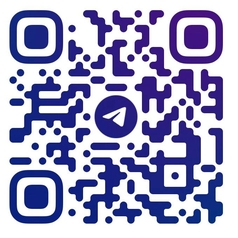

In [33]:
#vibo: ЗАПУСКАЕМ БОТ
bot.polling(none_stop=True, interval=0)

Building the style transfer model..


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


Optimizing..
run [50]:
Style Loss : 33.918274 Content Loss: 24.581696

run [100]:
Style Loss : 8.733150 Content Loss: 22.921654

run [150]:
Style Loss : 3.208840 Content Loss: 21.532785

run [200]:
Style Loss : 1.522089 Content Loss: 20.452429

run [250]:
Style Loss : 1.085021 Content Loss: 19.732985

run [300]:
Style Loss : 0.959299 Content Loss: 19.322689

run [350]:
Style Loss : 0.918751 Content Loss: 19.056442

run [400]:
Style Loss : 0.879553 Content Loss: 18.883200

run [450]:
Style Loss : 0.958309 Content Loss: 18.720724

run [500]:
Style Loss : 0.870210 Content Loss: 18.639301

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 31.240116 Content Loss: 24.721821

run [100]:
Style Loss : 9.617170 Content Loss: 23.120361

run [150]:
Style Loss : 3.419917 Content Loss: 21.588942

run [200]:
Style Loss : 1.596134 Content Loss: 20.462425

run [250]:
Style Loss : 1.101296 Content Loss: 19.787403

run [300]:
Style Loss : 0.999166 Content Loss: 19.285057

run [350]: